In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('indian_food.csv')

In [3]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## Exploratory Data Analysis

In [4]:
data.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [5]:
# Null values are indicated by -1 so null values will be converted to -1 for uniformity

data.loc[data['region'].isna(),'region']='-1'

In [6]:
for col in data.columns:
    print(col,' : ',len(data[data[col]==-1].index))

name  :  0
ingredients  :  0
diet  :  0
prep_time  :  30
cook_time  :  28
flavor_profile  :  0
course  :  0
state  :  0
region  :  0


In [7]:
data.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [8]:
data.nunique()

name              255
ingredients       252
diet                2
prep_time          22
cook_time          19
flavor_profile      5
course              4
state              25
region              7
dtype: int64

In [9]:
for col in data.columns:
    print(col,' : ',round(len(data[data[col]==-1].index)/len(data)*100,2))

name  :  0.0
ingredients  :  0.0
diet  :  0.0
prep_time  :  11.76
cook_time  :  10.98
flavor_profile  :  0.0
course  :  0.0
state  :  0.0
region  :  0.0


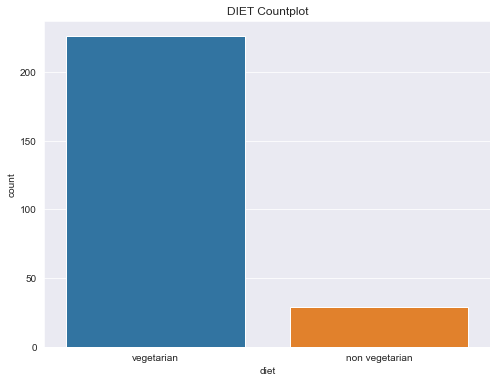

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data['diet'])
plt.title('DIET Countplot')
plt.show()

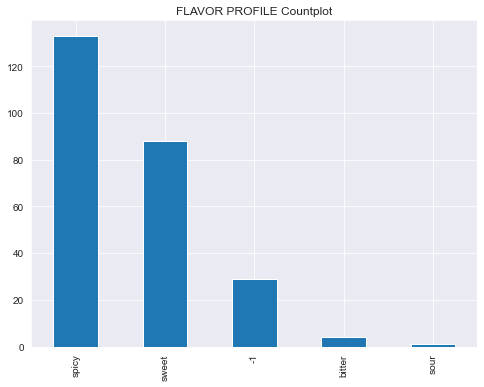

In [11]:
data['flavor_profile'].value_counts().plot(kind='bar',figsize=(8,6))
plt.title('FLAVOR PROFILE Countplot')
plt.show()

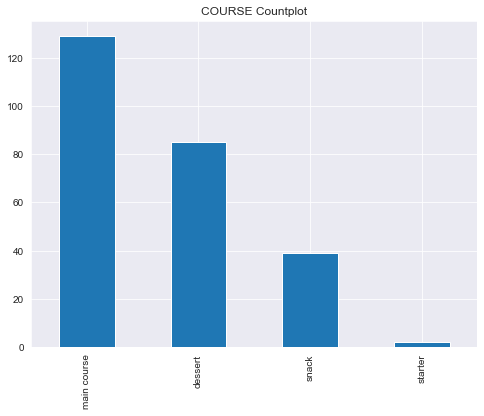

In [12]:
data['course'].value_counts().plot(kind='bar',figsize=(8,6))
plt.title('COURSE Countplot')
plt.show()

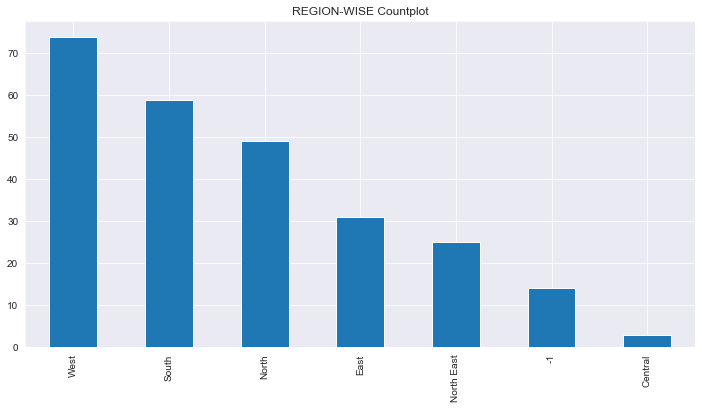

In [13]:
data['region'].value_counts().plot(kind='bar',figsize=(12,6))
plt.title('REGION-WISE Countplot')
plt.show()

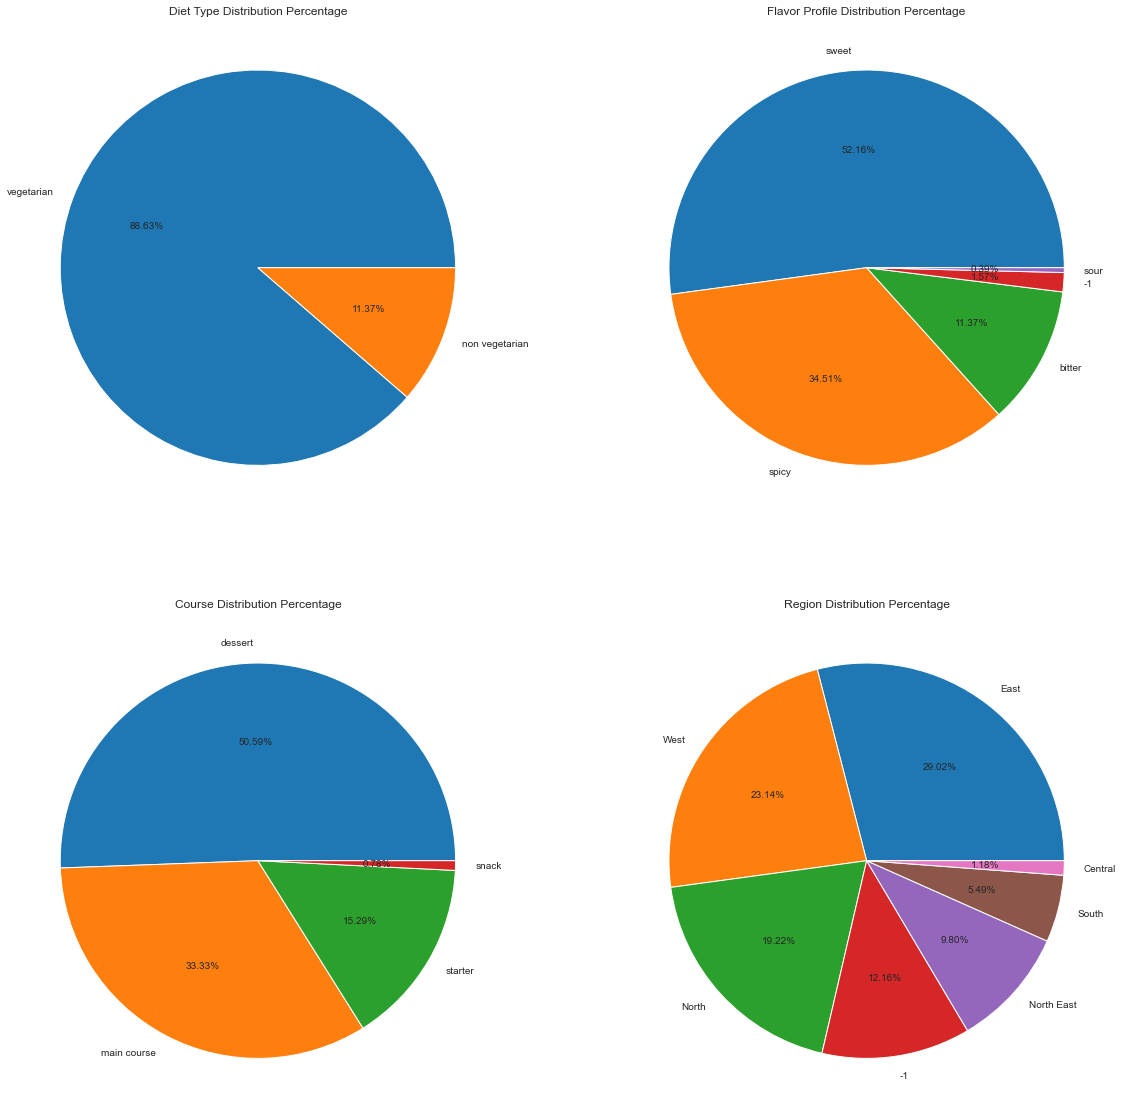

In [14]:
# diet, flovor profile, course, region
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.pie(data['diet'].value_counts(),autopct='%1.2f%%',labels=data['diet'].unique())
plt.title('Diet Type Distribution Percentage')
plt.subplot(2,2,2)
plt.pie(data['flavor_profile'].value_counts(),autopct='%1.2f%%',labels=data['flavor_profile'].unique())
plt.title('Flavor Profile Distribution Percentage')
plt.subplot(2,2,3)
plt.pie(data['course'].value_counts(),autopct='%1.2f%%',labels=data['course'].unique())
plt.title('Course Distribution Percentage')
plt.subplot(2,2,4)
plt.pie(data['region'].value_counts(),autopct='%1.2f%%',labels=data['region'].unique())
plt.title('Region Distribution Percentage')
plt.show()

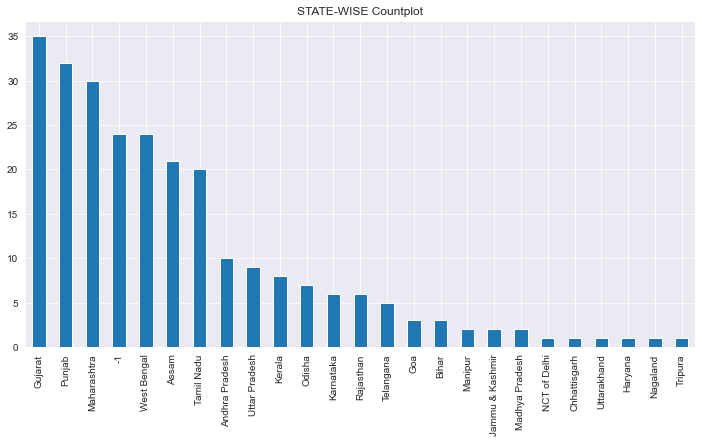

In [15]:
data['state'].value_counts().plot(kind='bar',figsize=(12,6))
plt.title('STATE-WISE Countplot')
plt.show()

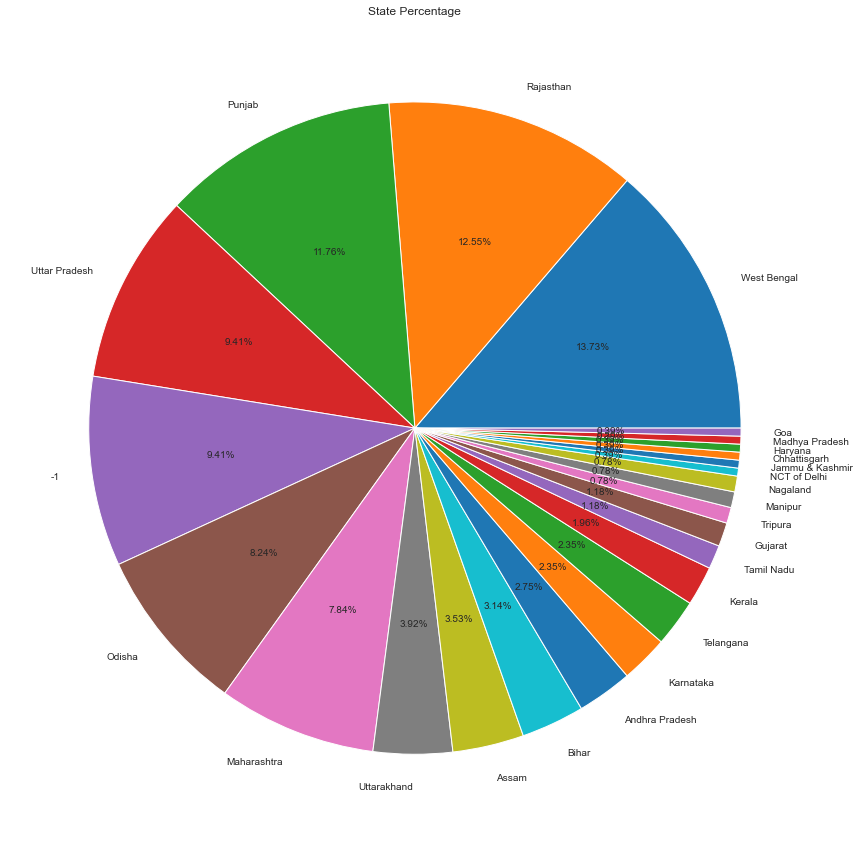

In [16]:
plt.figure(figsize=(15,15))
plt.pie(data['state'].value_counts(),autopct='%1.2f%%',labels=data['state'].unique())
plt.title('State Percentage')
plt.show()

In [17]:
data['num_ingd'] = data.ingredients.apply(lambda x : len(x.split(', ')))

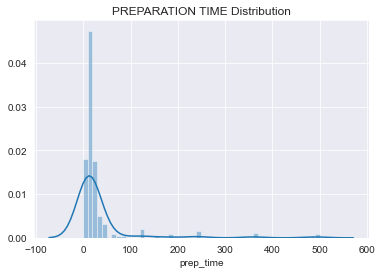

In [18]:
# plt.figure(figsize=(12,6))
sns.distplot(data['prep_time'])
plt.title('PREPARATION TIME Distribution')
plt.show()

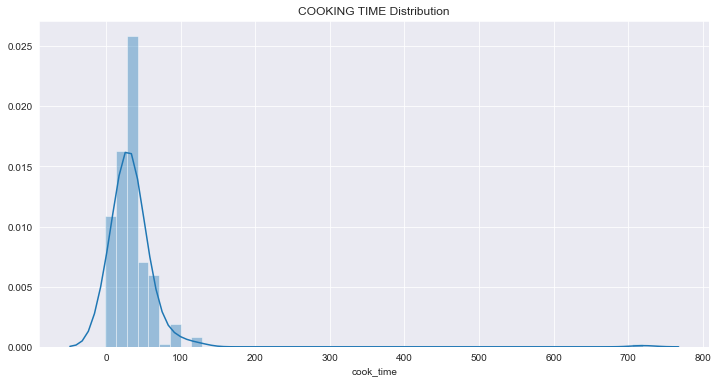

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(data['cook_time'])
plt.title('COOKING TIME Distribution')
plt.show()

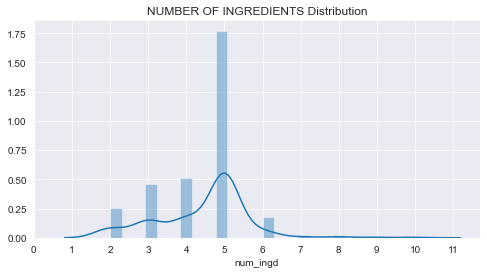

In [20]:
plt.figure(figsize=(8,4))
sns.distplot(data.num_ingd)
plt.xticks([i for i in range(0,12)])
plt.title('NUMBER OF INGREDIENTS Distribution')
plt.show()

## Preprocessing

In [21]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingd
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,8


In [22]:
ingredients = [ingd.split(', ') for ingd in data.ingredients]
print(ingredients)

[['Maida flour', 'yogurt', 'oil', 'sugar'], ['Gram flour', 'ghee', 'sugar'], ['Carrots', 'milk', 'sugar', 'ghee', 'cashews', 'raisins'], ['Flour', 'ghee', 'kewra', 'milk', 'clarified butter', 'sugar', 'almonds', 'pistachio', 'saffron', 'green cardamom'], ['Milk powder', 'plain flour', 'baking powder', 'ghee', 'milk', 'sugar', 'water', 'rose water'], ['Sugar syrup', 'lentil flour'], ['Maida', 'corn flour', 'baking soda', 'vinegar', 'curd', 'water', 'turmeric', 'saffron', 'cardamom'], ['Cashews', 'ghee', 'cardamom', 'sugar'], ['Milk', 'cottage cheese', 'sugar'], ['Milk', 'rice', 'sugar', 'dried fruits'], ['Gram flour', 'ghee', 'sugar'], ['Yogurt', 'milk', 'nuts', 'sugar'], ['Refined flour', 'besan', 'ghee', 'powdered sugar', 'yoghurt', 'green cardamom'], ['Firm white pumpkin', 'sugar', 'kitchen lime', 'alum powder'], ['Rice', 'sugar', 'nuts'], ['Condensed milk', 'sugar', 'spices', 'nuts'], ['Semolina', 'ghee', 'nuts', 'milk'], ['Khoa', 'coconut', 'molu leaf'], ['Corn flour', 'ghee', 'dry

In [23]:
all_ingd = list(set([ing.lower().strip() for ingd in ingredients for ing in ingd]))
all_ingd.sort()
len(all_ingd)

365

In [24]:
print(all_ingd)

['all purpose flour', 'almond', 'almonds', 'aloo', 'alum powder', 'amaranth leaves', 'amchur powder', 'apricots', 'arbi ke patte', 'arhar dal', 'arrowroot powder', 'atta', 'avocado oil', 'axone', 'baby corn', 'baby potatoes', 'badam', 'baingan', 'baking powder', 'baking soda', 'banana', 'banana flower', 'basmati rice', 'bay leaf', 'beans', 'beaten rice flakes', 'beef', 'beetroot', 'bell pepper', 'bell peppers', 'bengal gram flour', 'besan', 'besan flour', 'bhatura', 'bhuna chana', 'biryani masala', 'biryani masala powder', 'bitter gourd', 'black lentils', 'black pepper', 'black salt', 'black sesame seeds', 'blend rice', 'boiled pork', 'boiled potatoes', 'bombay duck', 'bombay rava', 'boondi', 'bottle gourd', 'bread crumbs', 'brinjal', 'brown rice', 'brown rice flour', 'butter', 'cabbage', 'canned coconut milk', 'capsicum', 'cardamom', 'cardamom pods', 'cardamom powder', 'carrot', 'carrots', 'cashew nuts', 'cashews', 'cashews and raisins', 'cauliflower', 'chana daal', 'chana dal', 'chen

In [25]:
ingd_vec = []
for i in range(len(data)):
    k=[0]*len(all_ingd)
    for val in ingredients[i]:
        k[all_ingd.index(val.lower().strip())]=1
    ingd_vec.append(k)

In [26]:
for i in range(len(ingd_vec)):
    print(ingd_vec[i])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [27]:
data['ingd_vec']=ingd_vec

In [28]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingd,ingd_vec
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,10,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Similarity determination

In [29]:
similarity_dict={}
for i in range(len(data)):
    for j in range(0,len(data)):
        if i!=j:
            recipe_1 = data.loc[i,'name'].lower().strip()
            recipe_2 = data.loc[j,'name'].lower().strip()
            similarity_dict[recipe_1,recipe_2]=np.round(cosine_similarity([data.loc[i,'ingd_vec']],[data.loc[j,'ingd_vec']])[0,0],4)*100

In [30]:
recipe = [word.lower().strip() for word in data['name'].values]

In [31]:
reg_wise={}
for region in data.region.unique():
    reg_wise[region.lower()] = [recipe.lower().strip() for recipe in data[data['region']==region]['name'].values]

In [32]:
state_wise={}
for state in data.state.unique():
    state_wise[state.lower()] = [recipe.lower().strip() for recipe in data[data['state']==state]['name'].values]

In [33]:
def random_item_similarity(recipe_1,recipe_2):
    rec_1 = recipe_1.lower().strip()
    rec_2 = recipe_2.lower().strip()
    if rec_1 in recipe and rec_2 in recipe:
        print(f"Similarity of ingredients b/w {recipe_1} and {recipe_2} is {str(similarity_dict[rec_1,rec_2])}%.")
    else:
        print('Either or all of the food items provided do not belogn to the dataset.')

In [34]:
def reg_wise_similarity(recipe_1,recipe_2,region_1='-1',region_2='-1'):
    region_1 = region_1.lower().strip()
    region_2 = region_2.lower().strip()
    rec_1 = recipe_1.lower().strip()
    rec_2 = recipe_2.lower().strip()
    if region_1 in reg_wise.keys() and region_2 in reg_wise.keys():
        if (rec_1 in reg_wise[region_1] or rec_2 in reg_wise[region_1]) and (rec_1 in reg_wise[region_2] or rec_2 in reg_wise[region_2]):
            print(f"Similarity of ingredients b/w {recipe_1} and {recipe_2} is {str(similarity_dict[rec_1,rec_2])}%.")
        else:
            print('Sorry, Either or all of the food itmes provided do not belong to the the regions.')
    else:
        print('Sorry, One or both the regions provided do not belong to dataset.')

In [35]:
def state_wise_similarity(recipe_1,recipe_2,state_1='-1',state_2='-1'):
    state_1 = state_1.lower().strip()
    state_2 = state_2.lower().strip()
    rec_1 = recipe_1.lower().strip()
    rec_2 = recipe_2.lower().strip()
    if state_1 in state_wise.keys() and state_2 in state_wise.keys():
        if (rec_1 in state_wise[state_1] or rec_2 in state_wise[state_1]) and (rec_1 in state_wise[state_2] or rec_2 in state_wise[state_2]):
            print(f"Similarity of ingredients b/w {recipe_1} and {recipe_2} is {str(similarity_dict[rec_1,rec_2])}%.")
        else:
            print('Sorry, Either or all of the food item provided do not belong to the states.')
    else:
        print('Sorry, One or both the states provided do not belong to dataset.')

In [36]:
def similarity_func_format():
    print(f"Format of function for random item similarity : random_item_similarity('recipe_1','recipe_2')")
    print(f"Format of function for region-wise similarity : reg_wise_similarity('recipe_1','recipe_2','region_1','region_2')")
    print(f"Format of function for state-wise similarity  : state_wise_similarity('recipe_1','recipe_2','state_1','state_2')")

In [37]:
similarity_func_format()

Format of function for random item similarity : random_item_similarity('recipe_1','recipe_2')
Format of function for region-wise similarity : reg_wise_similarity('recipe_1','recipe_2','region_1','region_2')
Format of function for state-wise similarity  : state_wise_similarity('recipe_1','recipe_2','state_1','state_2')


In [38]:
random_item_similarity('gulab jamun','boondi')

Similarity of ingredients b/w gulab jamun and boondi is 40.82%.


In [39]:
reg_wise_similarity('gulab jamun','boondi','east','west')

Similarity of ingredients b/w gulab jamun and boondi is 40.82%.


In [40]:
state_wise_similarity('balu shahi','basundi','west bengal','gujarat')

Similarity of ingredients b/w balu shahi and basundi is 28.87%.
